In [72]:
import pandas as pd

pd.set_option('display.max_columns', None)
df=pd.read_csv("datasets/customer_churn.csv")
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,Yes
1,41,Female,28,28,7,13,Standard,Monthly,584,20,No
2,47,Male,27,10,2,29,Premium,Annual,757,21,No
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,No
4,53,Female,58,24,9,2,Standard,Annual,533,18,No
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,Yes
64370,37,Male,6,1,5,22,Standard,Annual,923,9,Yes
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,Yes
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,Yes


In [73]:
df.dtypes



Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                object
dtype: object

In [74]:
# columns have correct datatypes
# do we have empty values

In [75]:
df["Gender"].replace({"Female": 1, "Male": 2}, inplace=True)
df["Subscription Type"].replace({"Basic": 1, "Standard": 2, "Premium": 3}, inplace=True)
df["Contract Length"].replace({"Monthly": 1, "Quarterly": 2, "Annual": 3}, inplace=True)

/tmp/ipykernel_3689/3209575010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Female": 1, "Male": 2}, inplace=True)
/tmp/ipykernel_3689/3209575010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace({"Female": 1, "Male": 2}, inplace=True)
/tmp/ipykern

In [76]:
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  int64 
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  int64 
 7   Contract Length    64374 non-null  int64 
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  object
dtypes: int64(10), object(1)
memory usage: 5.4+ MB


In [77]:
# the goal is to help businesses identify customers that are likely to churn. this help them reduce therate of churning and improve their services


In [78]:
# basic statistics to understand data

# how many male by female
df.groupby('Gender').size()


Gender
1    34353
2    30021
dtype: int64

/tmp/ipykernel_3689/2577165838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df, palette="Reds")


<Axes: xlabel='Gender', ylabel='count'>

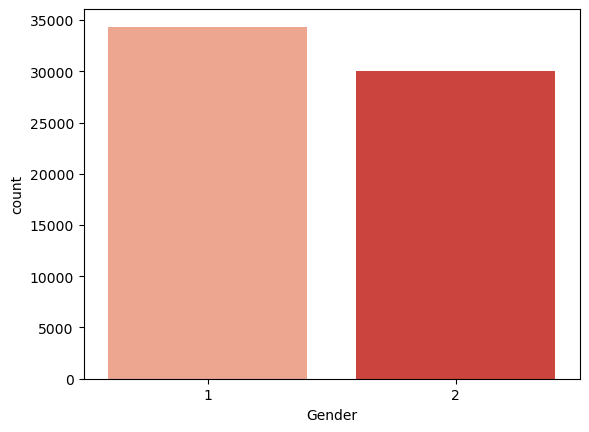

In [79]:
# to do EDA visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender',data=df, palette="Reds")

<Axes: xlabel='Gender', ylabel='count'>

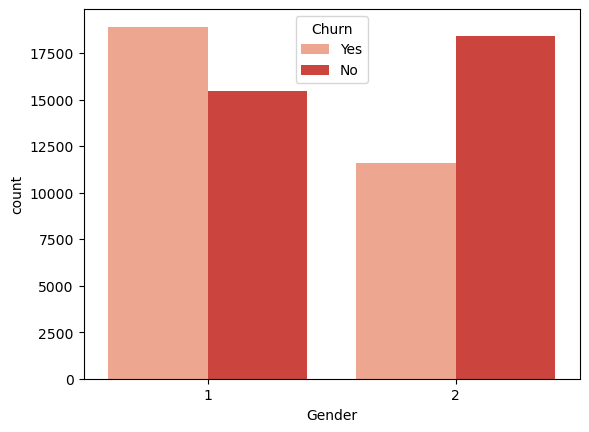

In [80]:
# churned customers vs gender
sns.countplot(x='Gender',data=df, palette="Reds" ,hue="Churn")

In [81]:
# once done with eda we proceed to actual ML

# Supervise machine learn require labeled data
# we slit data into features(x)  and outcome(y)
# features determine the outcome
# in our data is whether a customer will churn or not
# our feature is age to last interaction

In [82]:
# to split x and Y 
# 1. convert data values to a list
d_values=df.values
d_values

array([[22, 1, 25, ..., 598, 9, 'Yes'],
       [41, 1, 28, ..., 584, 20, 'No'],
       [47, 2, 27, ..., 757, 21, 'No'],
       ...,
       [25, 2, 39, ..., 327, 20, 'Yes'],
       [50, 1, 18, ..., 540, 13, 'Yes'],
       [52, 1, 45, ..., 696, 22, 'Yes']], dtype=object)

In [83]:
# we said x is age to last interaction
# age is index 0 and last interaction is index 9
# we shall then slice the list from index 0 and 10 and the last value in the range is -1
# before sclicing we have 2 list, the list holding all the rows and a list for each row
# we shall not slice the list containing all the rows but the list for each row


In [84]:
d_values[0:10]

array([[22, 1, 25, 14, 4, 27, 1, 1, 598, 9, 'Yes'],
       [41, 1, 28, 28, 7, 13, 2, 1, 584, 20, 'No'],
       [47, 2, 27, 10, 2, 29, 3, 3, 757, 21, 'No'],
       [35, 2, 9, 12, 5, 17, 3, 2, 232, 18, 'No'],
       [53, 1, 58, 24, 9, 2, 2, 3, 533, 18, 'No'],
       [30, 2, 41, 14, 10, 10, 3, 1, 500, 29, 'No'],
       [47, 1, 37, 15, 9, 28, 1, 2, 574, 14, 'Yes'],
       [54, 1, 36, 11, 0, 18, 2, 1, 323, 16, 'No'],
       [36, 2, 20, 5, 10, 8, 1, 1, 687, 8, 'No'],
       [65, 2, 8, 4, 2, 23, 1, 3, 995, 10, 'No']], dtype=object)

In [85]:
# what should we do
# the list with all the rows should remain unchanged
# the small list representing each individual row is what we 

X=d_values[:, :10]
# when slicing if starting from zero we specify nothing to the left of the column (:)
# if going to the end, we specify nothing to the right of (:)
# in the code d_incident we move to the small list which is sliced from index 0 to 10

In [86]:
# the y is the last column index 10
# we do not slice as we are simply accessing a single value
Y=d_values[: , 10]

In [87]:
# selecting a model
# questions to ask yourself:
# 1. end variable
# 2. explainability
# 3. data we have
# 4. undersatand the data we have

# machine learning model are based on the end variable
# common models
#  k-nearest neighbour
#  Naive bayes
#  logistic regression 
#  SVM
#  Random forest
# multi-layer,
# deep learning


# the goal was , tell whether a customer is likely to churn or not
# the end data is categorical data/class
# there we choose a classification model

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [89]:
# SUPERVISED MACHINE LEARNING - there is training testing and deploying

# we therefore split the data into training and testing
# atleast more that half should be used for the training
# we use the model selection method to split
from sklearn import model_selection


X_train, X_test ,Y_train,Y_test=model_selection.train_test_split(X,Y, test_size=0.3 , random_state=42)

In [90]:
len(X_train)
len(X_test)

19313

In [91]:
# we now the training and testing data
# next is selcting a model - we have multiple option

In [92]:
model=GradientBoostingClassifier()

# train the model
model.fit(X_train,Y_train)

GradientBoostingClassifier()

In [94]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

score = accuracy_score(Y_test, predictions)
score

0.998343084968674